
# GEO 203: Fundamentals of Solid Earth Science

## Problem Sheet \# 1 Age of the Earth and Plate Tectonics

*Due 11:59pm Tuesday, September 20 via Gradescope upload (see Canvas link)*

IN THE SPACE BELOW, WRITE OUT IN FULL AND THEN SIGN THE HONOR PLEDGE:

“I pledge my honor that I have not violated the honor code during this examination.”

**PRINT NAME**:

By uploading this assignment through Canvas, I sign off on the document below electronically.

----

## Downloads from the Internet

We will need some files from the internet that will be used in this assignment. If you get errors in the following cell block, it probably means the machine (or the node in a cluster) you are calling this command from does not have direct internet access. 

**Note**: If you are on the Adroit cluster in Princeton, please make sure you are within a *Jupyter on Adroit Vis* session since this node has internet access. You can use any other session for the remaining cells in this notebook; *Jupyter for classes* is suggested since a dedicated session has been created for this course.

In [ ]:
import os
import requests

# Define the list of remote files to retrieve
remote_urls = ['https://portal.globalseismology.org/files/DATA/GLOBALTOPO/ETOPO1_Bed_g_gmt4.grd']

# loop through all remote URL and download the files
for remote_url in remote_urls:
    # Define the local filename to save data
    # get the trailing filename after the last / of the path
    local_file = os.path.basename(remote_url)
  
    # Download remote and save locally
    r = requests.get(remote_url, allow_redirects=True)
    open(local_file, 'wb').write(r.content)

----
## Part I: Age of the Earth

In this question you will be carrying out a famous set of geochronological calculations by Patterson (1956) - the first correct age of the Earth. Read Patterson (1956). The 1956 paper is commonly cited as the first correct determination of the age of the Earth (estimates now are about 4.567 Ga).

![A picture of Claire Patterson](CPatterson.jpeg)

Image: Claire Patterson (Credit: Caltech Archives)

![A thumbnail picture of Patterson 1956 paper](Patterson+56_Thumbnail.png)

Image: The first page from Patterson (1956) paper.

### Mini-tutorial

 - **Opening text (*.txt) files with pandas**
 - **Basic curve fitting with numpy**
 - **Basic scatter and line plot with matplotlib**

You will need to use Python for problems that require computation and making plots for this class. 

Here is a walkthrough example for fitting the data and make a plot. We will read a data file, perform linear regression, and make a plot of the data. Most of the time, your code begins with importing libraries such as `numpy` (for vector calulation), `pandas` (for reading table), and `matplotlib.pyplot` (for making plots). If you are not familar with these libraries, feel free to follow examples in the previous precepts or the tutorial online for [numpy](https://www.w3schools.com/python/numpy/default.asp) and [matplotlib](https://matplotlib.org/stable/tutorials/index.html).


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title">Python Review</p>
<p>Remember the difference between a single equals sign `=` and a double equals sign `==`?</p>
 
<ul>
<li>A single equals sign `=` is used for variable assignment </li> 
    <li>A double equals sign `==` is used as the equals operator </li>
</div>

First, let us create an example dataset that will be used in curve fitting exercise. The basic form of a line is `y=m*x+b` where `m` is the slope and `b` is the intercept of the line in the y-axis. We are adding a bit of noise from a normal distribution to make numpy work a bit harder! We will check later if the fitted values numpy gives for `m` and `b` is similar to what we started off with. 
```python
# How the file is generate
x = np.sort(5 + 20 * np.random.random(12))
y = 5 * x + 3.5 + np.random.normal(0, 7.5, 12)

fname = "example-data.txt"
f = open(fname, "w")
f.write("x\ty\n")
for ii in range(len(x)):
    f.write("%.3f\t%.3f\n"%(x[ii], y[ii]))
f.close()
```

You need not run the commands above since we have already done this for you. First, let us read the file using the pandas module.

In [7]:
# pandas read_table allows you to read a table of any structure
# useful when you are not sure how to read the file
table = pd.read_table("example-data.txt")

# displays the table we have just read
table

,x,y
0,5.553,22.818
1,6.735,39.294
2,7.780,48.010
3,10.542,64.029
4,10.870,54.845
5,11.499,48.524
6,16.689,87.874
7,19.600,114.331
8,20.703,101.660
9,22.550,121.006


In [8]:
# access a column of the table by using column's header as a key
table['x']

0      5.553
1      6.735
2      7.780
3     10.542
4     10.870
5     11.499
6     16.689
7     19.600
8     20.703
9     22.550
10    23.762
11    24.092
Name: x, dtype: float64

In [9]:
# One example on how to fit a line using numpy polyfit
x = np.array(table['x'])
y = np.array(table['y'])

p = np.polyfit(x, y, 1)

# y-value of the best-fitted line
y_fit = p[0] * x + p[1]

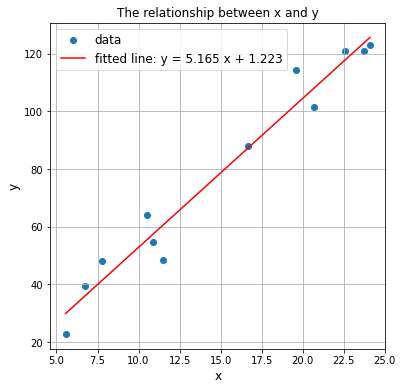

In [10]:
# Basic steps on how to make a plot using matplotlib

# creates a figure
fig = plt.figure(figsize=[6,6])

# makes a scatter plot
plt.scatter(x, y, label='data')

# makes a line plot
text = "fitted line: y = %.3f x + %.3f"%(p[0], p[1])
plt.plot(x, y_fit, 'r', label=text)

# labels the axes 
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('The relationship between x and y', fontsize=12)

# adds grid lines
plt.grid()

# adds a legend box
plt.legend(fontsize=12)

# shows the figure
plt.show()

**Note**: The value numpy calculated for `m` (5.165) and `b` (1.223) was slightly different from what we started with (5,1). 


### To Do

1. Using the data in Table 1 from that paper (this is also saved as the uploaded file PS1-data.txt which can be opened by a basic text editor like notepad) recalculate Patterson’s age of the Earth. You should use the same values as Patterson did for $\lambda_{238}$, $\lambda_{235}$, and present day $\frac{^{238}\text{U}}{^{235}\text{U}}$ . You can use whatever linear regression calculation you want (the one geochronologists use now is that of York (1969) - the York Fit). Please hand in a graph showing your fit to the data.

**Answer**:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# pandas read_table allows you to read a table of any structure
# useful when you are not sure how to read the file
table = pd.read_table("PS1-data.txt")

# displays the table we have just read
table

,206/204,207/204,208/204,Unnamed: 3
0,50.28,34.86,67.97,Mexico
1,19.27,15.95,39.05,Iowa
2,19.48,15.76,38.21,Kansas
3,9.55,10.38,29.54,Australia
4,9.46,10.34,29.44,Arizona


In [3]:
# access a column of the table by using column's header as a key
table['206/204']

0    50.28
1    19.27
2    19.48
3     9.55
4     9.46
Name: 206/204, dtype: float64

In [4]:
# One example on how to fit a line using numpy polyfit
p = np.polyfit(table['206/204'], table['207/204'], 1)
x = np.array(table['206/204'])
y = p[0] * x + p[1]

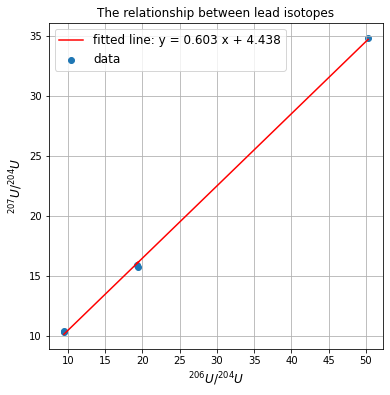

In [5]:
# Basic steps on how to make a plot using matplotlib
# See https://matplotlib.org/stable/index.html for documentation and examples

# creates a figure
fig = plt.figure(figsize=[6,6])

# makes a scatter plot
plt.scatter(table['206/204'], table['207/204'], label='data')

# makes a line plot
text = "fitted line: y = %.3f x + %.3f"%(p[0], p[1])
plt.plot(x, y, 'r', label=text)

# labels the axes 
plt.xlabel(r'$^{206}U/^{204}U$', fontsize=12)
plt.ylabel(r'$^{207}U/^{204}U$', fontsize=12)
plt.title('The relationship between lead isotopes', fontsize=12)

# adds grid lines
plt.grid()

# adds a legend box
plt.legend(fontsize=12)

# shows the figure
plt.show()

2. How does Patterson justify that the age of Earth is the same as the meteorites’ ?

**Answer**:

3. What are the three assumptions that need to be met in order for an isochron to be meaningful? Do you think this is met for Patterson’s meteorites? (You may answer this qualitatively.)

**Answer**:

----

## Plate Tectonics

The theory of plate tectonics posits that the Earth’s lithosphere (crust and upper mantle) is broken into a number of jigsaw puzzle-like plates which move relative to one another over a plastically-deforming (but still solid) asthenosphere (mid and lower mantle). The boundaries between plates are narrow zones marked by a variety of topographic and tectonic features, and there is significantly less (but still some) tectonic activity in the interior of plates.

You will be exploring some of the evidence on which plate tectonics is based, and which is used to interpret plate tectonic processes. 
 
### Topography of the continents and bathymetry of the sea floor 

We are all relatively familiar with the topography of the Earth’s surface above sea level, but less so with the bathymetry of Earth’s surface below sea level. Before this bathymetry was known, most people assumed that the sea floor was relatively flat and featureless, and personal experience with lakes and rivers suggested that the deepest part would be in the middle.

Actual mapping of the sea floor, however, showed some surprises.  Such mapping began in the 1930’s but accelerated during World War II with the advent of submarine warfare. Princeton Geosciences Professor Harry Hess played a pivotal role; as captain of the USS Cape Johnson he used the ship’s echo sounder to “ping” the seafloor and measure depth profiles as the transport ship traversed the Pacific Ocean.   After the war, this data led him to propose the process of seafloor spreading, a hypothesis crucial to the development of the theory of plate tectonics.

Modern methods to measure bathymetry include
- Multi-beam echo sounders that map a wide swath of seafloor.
- Satellite measurement of variations in sea level due to variations in gravitational pull over bathymetric features  – sea level is slightly lower over low spots on the sea floor and slightly higher over high spots.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


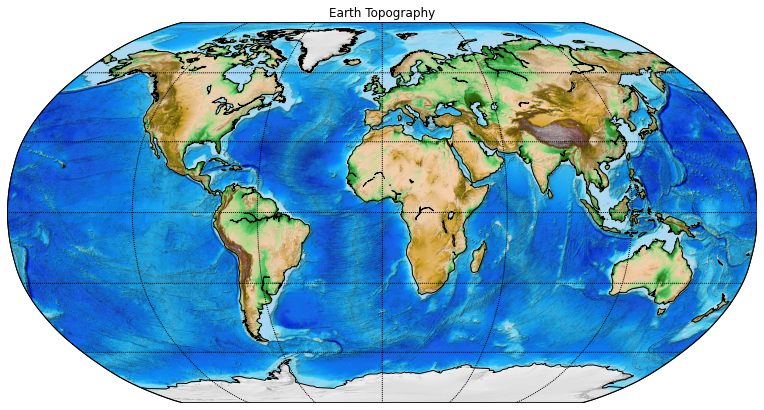

In [4]:
import os
os.environ['PROJ_LIB'] = os.path.join(os.environ['CONDA_PREFIX'],'share/proj')

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[14, 7])
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary()
m.etopo()
plt.title("Earth Topography")
plt.show()

### Mini-tutorial

Use XArray to read netCDF file.

<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title">Python Review</p>
<p>Remember the difference between a single equals sign `=` and a double equals sign `==`?</p>
 
<ul>
<li>A single equals sign `=` is used for variable assignment </li> 
    <li>A double equals sign `==` is used as the equals operator </li>
</div>

### To Do

1. Examine the Atlantic Ocean between North/South America and Eurasia/Africa. Note that the deepest part is not in the middle; instead there is an underwater mountain range that runs down the middle of the ocean.  This is termed an ocean ridge or spreading ridge (more on spreading later).  Zoom in enough to see that although the ridge is a topographic high, it also has a valley (the “rift valley”) in the middle. Scan around to see the ocean ridges in the Indian, Pacific and Southern Oceans.
    1. About how high does the mid-Atlantic ridge rise above the deep part of the Atlantic Ocean floor?
    2. A “mid-ocean” ridge isn’t always in the middle of the ocean. Describe/sketch/show the position of the ridge in the Pacific Ocean called the “East Pacific Rise.”
    3. Where is the only place where a “mid-ocean” ridge rises above sea level (hint, follow the mid-Atlantic ridge northwards)?

ConnectionError: HTTPSConnectionPool(host='portal.globalseismology.org', port=443): Max retries exceeded with url: /files/DATA/GLOBALTOPO/ETOPO1_Bed_g_gmt4.grd (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f61d2511100>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [3]:
remote_urls = ['https://portal.globalseismology.org/files/DATA/GLOBALTOPO/ETOPO1_Bed_g_gmt4.grd']
aa=remote_urls[0]

In [4]:
aa

'https://portal.globalseismology.org/files/DATA/GLOBALTOPO/ETOPO1_Bed_g_gmt4.grd'

In [2]:
#!wget https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/ice_surface/cell_registered/netcdf/ETOPO1_Ice_c_gmt4.grd.gz

from urllib import request

# Define the remote file to retrieve
remote_url = 'https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/ice_surface/cell_registered/netcdf/ETOPO1_Ice_c_gmt4.grd.gz'
# Define the local filename to save data
local_file = 'ETOPO1_Ice_c_gmt4.grd.gz'
# Download remote and save locally
request.urlretrieve(remote_url, local_file)

URLError: <urlopen error [Errno -2] Name or service not known>

2. So if the Earth’s lowest spots aren’t in the middle of the ocean, where are they? Focus on the west coast of South America and note the deep linear ocean trench about 100km off shore that runs along the length of the continent.
    1. Describe the locations of two other trench systems
    2. “Search” and “fly to” Challenger Deep, the lowest point on Earth’s seafloor and Mt.Everest, the highest point on Earth’s land surface.   Use the Status Bar to get the elevation/depth of each. Which is greater, the elevation of Mt. Everest above sea level or the depth of Challenger Depth below sea level.  By how much in absolute and percentage terms?  Does this surprise you?


## Seismicity

An earthquake is a vibration of Earth caused by the sudden release of energy, usually as an abrupt breaking of rock along planar fractures called faults.  An earthquake initiates at its hypocenter or focus at some depth below the land surface or sea floor. The epicenter of the earthquake is defined as the point on the Earth’s surface above where the earthquake initiated.

But only rocks that are relative cold and brittle (the Earth’s lithosphere) can be broken in earthquakes.  Rocks that are hot and ductile (e.g. the Earth’s asthenosphere) will deform without breaking, and thus do not produce earthquakes.  So observing where earthquakes occur, both horizontally and with depth, tells us something about where stress is concentrated, and also about the material properties of the earth.

In [61]:
import plotly.express as px

In [62]:
cmt_cat = pd.read_table("Global_CMT_1972_2018.csv", delimiter=',')
cmt_cat = cmt_cat.sort_values(by=['ep.depth', 'centroid.MW'])

/tmp/ipykernel_1911276/3802825067.py:1: DtypeWarning:

Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.



In [63]:
def plot_earthquake_map(catalog):
    # interactive scatter plot
    fig = px.scatter(catalog, x="ep.lon", y="ep.lat", size="centroid.MW", color="ep.depth", width=1200, height=600, 
                     labels={"ep.lon":"longitude (degrees)", "ep.lat":"latitude (degrees)", "centroid.MW":"Mw",
                             "ep.depth":"depth (km)", "ep.timestamp":"origin time"}, 
                     hover_data=['ep.timestamp'], title="Global CMT catalog (N = %d)"%len(catalog))
    
    # plot plate boundaries
    plates = np.genfromtxt("plates.txt", delimiter=',')
    # convert longitude range from [0,360] to [-180,180]
    plons = np.mod(plates[:,0] + 180, 360) - 180
    plats = plates[:,1]

    # cut off at 180 deg lon
    xtrk = np.mod(plons-180,360)
    is_cross = np.where(np.abs(xtrk[1:-1]-xtrk[0:-2]) > 90)[0]
    nans = np.empty(np.size(is_cross))
    nans[:] = np.nan
    plons = np.insert(plons, is_cross+1, nans)
    plats = np.insert(plats, is_cross+1, nans)
    
    # I don't know how include plate boundaries to earthquake catalog map
    #fig = px.line(plons, plats)
    
    
    fig.update_xaxes(range=[-180, 180], tickvals=np.arange(-180,190,30))
    fig.update_yaxes(range=[-90, 90], tickvals=np.arange(-90,100,15))
    fig.show()
    return len(plons), len(plats)

/tmp/ipykernel_1911276/1550021344.py:11: RuntimeWarning:

invalid value encountered in remainder

/tmp/ipykernel_1911276/1550021344.py:15: RuntimeWarning:

invalid value encountered in remainder



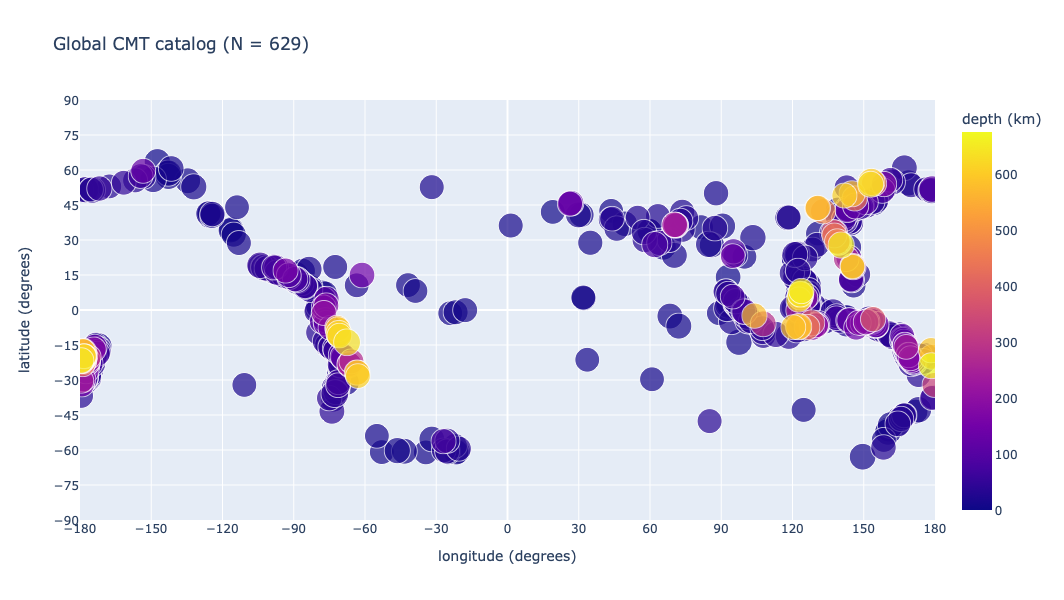

(1696, 1696)

In [64]:
# Filter to improve readablility
Mw_min    = 7                                 # Moment magnitude
Mw_max    = 10                                # Moment magnitude
depth_min = 0                                # minimum depth in km
depth_max = 6400                              # maximum depth in km
datetime_min = '0015-01-01 00:00:00.000000'   # 'yyyy-mm-dd hh:mm:ss.SSSSSS'
datetime_max = '2050-01-01 00:00:00.000000'   # 'yyyy-mm-dd hh:mm:ss.SSSSSS'

# Don't change these two statements
mask = (cmt_cat['centroid.MW'] >= Mw_min) & (cmt_cat['centroid.MW'] <= Mw_max) & (cmt_cat['ep.depth'] >= depth_min) & (cmt_cat['ep.depth'] <= depth_max) & (cmt_cat['ep.timestamp'] >= datetime_min) & (cmt_cat['ep.timestamp'] <= datetime_max)
plot_earthquake_map(cmt_cat[mask])

/tmp/ipykernel_1911276/3297027875.py:2: RuntimeWarning:

invalid value encountered in remainder

/tmp/ipykernel_1911276/3297027875.py:6: RuntimeWarning:

invalid value encountered in remainder



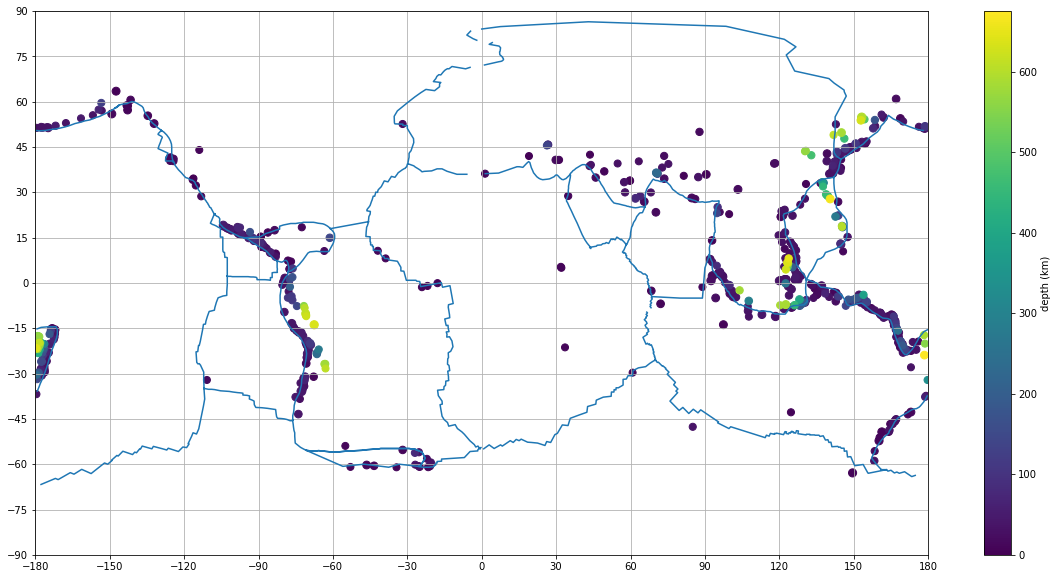

In [57]:
plates = np.genfromtxt("plates.txt", delimiter=',')
plons = np.mod(plates[:,0] + 180, 360) - 180
plats = plates[:,1]

# cut off at 180 deg lon
xtrk = np.mod(plons-180,360)
is_cross = np.where(np.abs(xtrk[1:-1]-xtrk[0:-2]) > 90)[0]
nans = np.empty(np.size(is_cross))
nans[:] = np.nan
plons = np.insert(plons, is_cross+1, nans)
plats = np.insert(plats, is_cross+1, nans)

fig = plt.figure(figsize=[20, 10])
plt.plot(plons,plats)
plt.scatter(cmt_cat['ep.lon'][mask], cmt_cat['ep.lat'][mask], 
            s=(cmt_cat['centroid.MW'][mask])**2, c=cmt_cat['ep.depth'][mask])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.xticks(np.arange(-180,200,30))
plt.yticks(np.arange(-90,100,15))
plt.grid()
c = plt.colorbar(label='depth (km)')

3. Examine the regions on and around Earth’s ocean ridges and ocean trenches. Both the spatial distribution and the depths of earthquakes associated with each are different.  Describe/illustrate these differences between earthquake associated with ridges and earthquakes associated with trenches.
4. Using earthquake depths as evidence, discuss whether the Earth’s lithosphere is thicker at ridges or at trenches.
5. Consider the belt of deepest earthquakes parallel to the Andes mountain chain (the 150-800km deep earthquakes colored in blue and red.)  On what plate are these earthquakes?  Explain.


## Volcanism

A volcano is an opening in the Earth’s surface through which melted rock (magma), volcanic ash and/or gases escape from the interior of the Earth. Under Dynamic Earth, compare the Volcanoes of the World layer and the Thirty years of large earthquakes layer, and the Plate Boundary Model layer. Turn on the “Volcanoes of the World” layer, which shows the location of 1500+ volcanoes that have been active over the last 10,000 years.  Most of these are on land, but some are underwater (called “seamounts”).  Clicking on a particular volcano icon brings up an information box about that volcano.

<ins>Mid-ocean ridge volcanism:</ins> While the “Volcanoes of the World” layer shows more than 1500 volcanoes, the vast majority of volcanic activity on Earth does not occur on land nor does it build volcanoes; instead it occurs at fissures underwater along the mid-ocean ridge system.  This is not shown on the “Volcanoes of the World” layer.

In [73]:
# Use encoding='cp1252' to avoid UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 87438: invalid start byte
# See https://stackoverflow.com/questions/29419322/unicodedecodeerror-utf8-codec-cant-decode-byte-0x92-in-position-377826-inva
volcanoes = pd.read_csv("GVP_Volcano_List_Holocene.csv", encoding='cp1252')

volcanoes

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.850,600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,45.775,2.970,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Pyroclastic cone(s),Eruption Dated,3600 BCE,Mediterranean and Western Asia,Western Europe,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
4,211004,Colli Albani,Italy,Caldera,Evidence Uncertain,Unknown,Mediterranean and Western Asia,Italy,41.730,12.700,949,Foidite,Subduction zone / Continental crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,390120,Leskov Island,United Kingdom,Stratovolcano,Unrest / Holocene,Unknown,Antarctica,Antarctica and South Sandwich Islands,-56.656,-28.140,190,Andesite / Basaltic Andesite,Subduction zone / Oceanic crust (< 15 km)
1328,390130,Zavodovski,United Kingdom,Stratovolcano,Eruption Observed,2016 CE,Antarctica,Antarctica and South Sandwich Islands,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction zone / Oceanic crust (< 15 km)
1329,390140,Protector Seamounts,United Kingdom,Submarine,Eruption Observed,1962 CE,Antarctica,Antarctica and South Sandwich Islands,-55.912,-28.167,-55,Rhyolite,Subduction zone / Oceanic crust (< 15 km)
1330,390829,Mount Haddington Volcanic Field,Antarctica,Shield,Evidence Credible,Unknown,Antarctica,Antarctica and South Sandwich Islands,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)


In [133]:
# turn last known eruption to integers (Positive for CE, negative for BCE, and nan for unknown)
from datetime import date
thisyear = date.today().year

years = np.zeros(len(volcanoes))
for ii in range(len(volcanoes)):
    if volcanoes['Last Known Eruption'][ii][-3:] == 'BCE':
        years[ii] = thisyear + int(volcanoes['Last Known Eruption'][ii][0:-4])
    elif volcanoes['Last Known Eruption'][ii][-3:] == ' CE':
        years[ii] = thisyear - int(volcanoes['Last Known Eruption'][ii][0:-3])
    else:
        years[ii] = np.nan

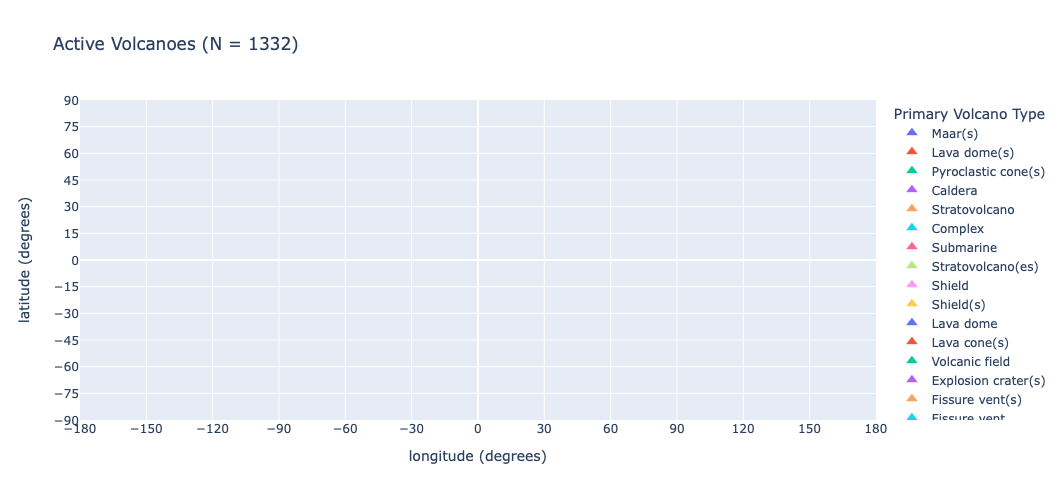

In [135]:
fig = px.scatter(volcanoes, x="Longitude", y="Latitude", width=1000, height=500, color='Primary Volcano Type', 
                 symbol_sequence=['triangle-up'],
                 labels={"Longitude":"longitude (degrees)", "Latitude":"latitude (degrees)","color":"Last Known Eruption (years before present)"}, 
                 hover_data=['Volcano Name', 'Primary Volcano Type', 'Last Known Eruption', 'Country', 'Tectonic Setting'], 
                 title="Active Volcanoes (N = %d)"%len(volcanoes))

fig.update_xaxes(range=[-180, 180], tickvals=np.arange(-180,190,30))
fig.update_yaxes(range=[-90, 90], tickvals=np.arange(-90,100,15))
fig.update_traces(marker={'size': 10})
fig.show()

In [130]:
from datetime import date

xxx = date.today().year
xxx

2022

6. You have seen that earthquakes are associated with plate boundaries, and we mention above that volcanism exists along the mid-ocean <u>ridges</u>.  What about volcanism associated with <u>trenches</u>?  Describe the spatial distribution of volcanoes associated with trenches and surrounding features (e.g. coastlines, island arcs, mountain ranges).


## Seafloor Age

#### Using geologic data to determine plate velocities (direction and magnitude)

7. Movement of the Pacific plate   
    1. Use data from Seafloor age layer to calculate the rate at which the Pacific plate has been moving away from the East Pacific Rise over the last 100 million years or so.  Use the Ruler tool from the tool bar to measure distance, and give your answer in mm/yr or km/my (note that these will be the same number!)

    Now turn off the sea floor age layer and turn on the *Volcanic Chains* layer. This shows the ages of younger volcanic rocks of various oceanic islands and seamounts, formed by eruptions onto older seafloor.

    Within the *Volcanic Chains* layer, find the Hawaiian Island/Emperor seamount chain and the Louisville seamount chain (east of New Zealand), both on the Pacific plate.  Zoom in so that the numbers representing the ages of the rocks in the chain (in millions of years) are displayed.  Note the age progression of each chain.

    Assume that each of these chains is generated by a plume or “hot spot” underneath the Pacific plate.  The “hot spots” periodically erupt to form volcanic islands atop the older ocean floor. However, once an island is no longer above the hot spot, volcanism shuts off and the volcano is eroded to sea level (getting a flattish top), and final sinks below sea level as the lithosphere cools and contracts. 

    We can explain the age progression of these island chains by either a plate moving over a stationary hot spot, or a moving hot spot under a stationary plate.  Let’s see which is supported by the data.

    2. Using the age progression of the Hawaiian Island/seamount chain, determine the implied velocity (remember that velocity includes both speed and direction) of a moving Pacific plate over the last 46.7 million years.
    3. Do the same using data for the Louisville chain in the southern Pacific Ocean (on the Pacific plate east of New Zealand).
    4. Compare the two volcanic chain data sets to the Seafloor age data set. Which is the best explanation:  the Pacific plate moving over fixed hot spots or a moving hot spots under a stationary Pacific plate?  Explain.
    5. Now compare this data set to the Easter Island chain on the Nazca plate on the other side of the East Pacific Rise.  Does the implied velocity of the Nazca plate fit the plate tectonic model you are developing with the Pacific plate data? Explain.
    6. If four independent data sets are good, five are even better, right?  Click on the GPS horizontal vectors layer.  These arrows show the horizontal component of the motion of GPS stations cemented into the ground, over the last decade or so. The length of the arrow is related to the speed (the longer, the faster).  Clicking on an arrow brings up a dialog box with the direction and magnitude of the motion, and a link to the time series from which this horizontal component is derived. Does the GPS data support your conclusions from above?  Explain.

8. The mid-Atlantic ridge and the Atlantic Ocean basin   
    1. With the Seafloor age layer clicked on, and without doing any calculations, is the mid-Atlantic ridge spreading ocean faster or slower than the East Pacific Rise?  Explain.
    2. Did the northern Atlantic Ocean basin begin opening at the same time as the southern Atlantic Ocean basin?   How much older or younger is the South 
